# V-I charactersitics of Neuron channel.

In [23]:
%matplotlib inline
from parameters import *
from tau_ch_plot_study import *
import numpy as np

In [24]:
from bokeh.io import output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure, output_file, show
output_notebook()

Loading BokehJS ...

In [48]:
VSHIFT = 5e-3 
tau_multiplier = 1
f = 0
gmbar_Na = 120e-3
gmbar_K = 36e-3
E_Na = .05 # reversal potentail.
E_K = -.08
K_n_params = get_k_n_params(VSHIFT=VSHIFT, tau=tau_multiplier, f=f)
Na_h_params = get_na_h_params(VSHIFT=VSHIFT, tau=tau_multiplier, f=f)
Na_m_params = get_na_m_params(VSHIFT=VSHIFT, tau=tau_multiplier, f=f)
vmin, vmax, vdivs = get_voltage_scales()

In [49]:
get_na_m_params(VSHIFT=VSHIFT, tau=tau_multiplier, f=f)

params(A_A=-4000.000000000001, A_B=-100000.0, A_C=-1.0, A_D=0.04000000000000001, A_F=-0.01, B_A=4000.0, B_B=0.0, B_C=0.0, B_D=0.065, B_F=0.018)

In [50]:
def get_alpha_beta_params(parameters):
    return (parameters[:5], parameters[5:])
get_alpha_beta_params(K_n_params)

((-550.0000000000001, -10000.0, -1.0, 0.05500000000000001, -0.01),
 (125.0, 0.0, 0.0, 0.065, 0.08))

In [51]:
def compute_alpha_beta(v, A, B, C, D, F):
    C = 1 if B == 0 else -1
    return (A+B*v)/(C+ np.exp((D+v)/F))

In [52]:
%%latex
General form
$$\alpha,\beta = \frac{A+BV_m}{C+\exp(\frac{D+V_m}{F})}$$

<IPython.core.display.Latex object>

In [53]:
%%latex
form-1 When B=0
$$\alpha,\beta = \left.\frac{A}{1+\exp(\frac{D+V_m}{F})}\right|_{B=0}$$

<IPython.core.display.Latex object>

In [54]:
%%latex
form-1 When B != 0
$$\alpha,\beta = \left.\frac{A+BV_m}{-1+\exp(\frac{D+V_m}{F})}\right|_{B\not =0}$$

<IPython.core.display.Latex object>

In [55]:
v_values = np.linspace(vmin, vmax, vdivs)

In [57]:
v_values

array([-0.1       , -0.09994998, -0.09989997, ...,  0.04989997,
        0.04994998,  0.05      ])

In [58]:
import pandas as pd
data = pd.DataFrame(v_values, columns=['voltage'])

In [59]:
data['k_n_alpha'] = data['voltage'].apply(compute_alpha_beta, 
                                          args=get_alpha_beta_params(K_n_params)[0])
data['k_n_beta'] = data['voltage'].apply(compute_alpha_beta, 
                                         args=get_alpha_beta_params(K_n_params)[1])

In [60]:
data['na_h_alpha'] = data['voltage'].apply(compute_alpha_beta,
                                           args=get_alpha_beta_params(Na_h_params)[0])
data['na_h_beta'] = data['voltage'].apply(compute_alpha_beta, 
                                            args=get_alpha_beta_params(Na_h_params)[1])

In [61]:
data['na_m_alpha'] = data['voltage'].apply(compute_alpha_beta, 
                                           args=get_alpha_beta_params(Na_m_params)[0])
data['na_m_beta'] = data['voltage'].apply(compute_alpha_beta, 
                                         args=get_alpha_beta_params(Na_m_params)[1])

In [95]:
data['n_forth'][1500]

0.5730623780292452

In [105]:
data['k_n_ss'] = data['k_n_alpha']/(data['k_n_alpha']+data['k_n_beta'])
data['na_m_ss'] = data['na_m_alpha']/(data['na_m_alpha']+data['na_m_beta'])
data['na_h_ss'] = data['na_h_alpha']/(data['na_h_alpha']+data['na_h_beta'])
data['m_cube'] = data['na_m_ss']**3
data['h_cube'] = data['na_h_ss']**3
data['n_forth'] = data['k_n_ss']**4
data['g_na'] = data['m_cube']*gmbar_Na*1
data['g_k'] = data['n_forth'][1200]*gmbar_K*1
data['na_v'] = data['voltage'] - E_Na
data['k_v'] = data['voltage'] - E_K
data['i_na'] = data['g_na'] * data['na_v']
data['i_k'] = data['g_k'] * data['k_v']
data['i_total'] = data['i_na'] + data['i_k']

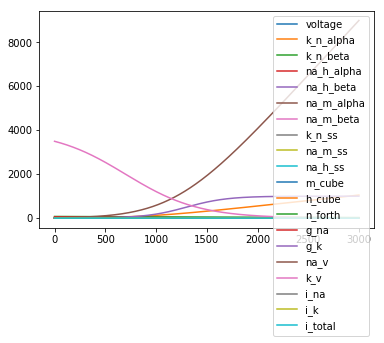

In [106]:
data.plot.line()

In [107]:
fig1 = figure(title="K+", x_axis_label='voltage', y_axis_label='current')
fig2 = figure(title="Na+", x_axis_label='voltage', y_axis_label='current')
fig1.line(data['voltage'], data['i_k'], line_color='red')
fig2.line(data['voltage'], data['i_na'], line_color='blue')
show(row(fig1, fig2))

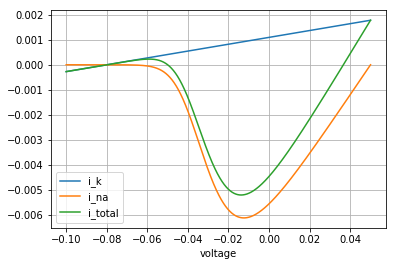

In [108]:
import matplotlib.pyplot as plt # I should Improve this plot!!!
a = data.plot(x='voltage', y='i_k')
data.plot(x='voltage', y='i_na', ax=a)
data.plot(x='voltage', y='i_total', ax=a)
plt.grid(True)

In [109]:
p = figure(title="VI characteristics", x_axis_label='voltage', y_axis_label='current')

In [110]:
p.line(data['voltage'], data['i_na'], line_color='blue', legend='i_na')
p.line(data['voltage'], data['i_k'], line_color='green', legend='i_k')
p.line(data['voltage'], data['i_total'], line_color='red', legend='i_total')

GlyphRenderer(id='b74cf334-785d-4449-a2d3-baccc81d7717', ...)

I'm unable to detect which starts first (Na or K).
Total current is plotting over Na.
I'm unable to see raise and fall of current which is expected from the textbook plot

In [111]:
show(p)

In [113]:
data['k_n_ss'] = data['k_n_alpha']/(data['k_n_alpha']+data['k_n_beta'])
data['na_m_ss'] = data['na_m_alpha']/(data['na_m_alpha']+data['na_m_beta'])
data['na_h_ss'] = data['na_h_alpha']/(data['na_h_alpha']+data['na_h_beta'])
data['m_cube'] = data['na_m_ss']**3
data['h_cube'] = data['na_h_ss']**3
data['n_forth'] = data['k_n_ss']**4
data['g_na'] = data['m_cube']*gmbar_Na*1
data['g_k'] = data['n_forth']*gmbar_K*1
data['na_v'] = data['voltage'] - E_Na
data['k_v'] = data['voltage'] - E_K
data['i_na'] = data['g_na'] * data['na_v']
data['i_k'] = data['g_k'] * data['k_v']
data['i_total'] = data['i_na'] + data['i_k']

### In the below graph after zooming in  I am able to find the Na current start just a moment before K current
### So I saw that Na current is fast compared to K.

In [114]:
p = figure(title="VI characteristics", x_axis_label='voltage', y_axis_label='current')
p.line(data['voltage'], data['i_na'], line_color='blue', legend='i_na')
p.line(data['voltage'], data['i_k'], line_color='green', legend='i_k')
p.line(data['voltage'], data['i_total'], line_color='red', legend='i_total')
show(p)